# Traffic Accidents Analysis & Prediction
This notebook analyzes traffic accident data, explores patterns using visualizations, and applies machine learning models to predict crash severity.

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set style
sns.set_style("whitegrid")


In [7]:

# Load the dataset
df = pd.read_csv("traffic_accidents.csv")

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


## Data Preprocessing

In [3]:

# Select relevant columns
selected_columns = [
    "weather_condition", "lighting_condition", "roadway_surface_cond", "crash_type", 
    "num_units", "most_severe_injury", "injuries_total", "crash_hour", 
    "crash_day_of_week", "crash_month"
]

df_selected = df[selected_columns]

# Encode categorical variables
categorical_columns = ["weather_condition", "lighting_condition", "roadway_surface_cond", "crash_type", "most_severe_injury"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    label_encoders[col] = le

df_selected.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13128\3229301742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13128\3229301742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13128\3229301742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,weather_condition,lighting_condition,roadway_surface_cond,crash_type,num_units,most_severe_injury,injuries_total,crash_hour,crash_day_of_week,crash_month
0,2,3,5,1,2,2,0.0,13,7,7
1,2,1,0,1,2,2,0.0,0,1,8
2,2,3,0,1,3,2,0.0,10,5,12
3,2,3,0,0,2,3,5.0,19,4,8
4,2,3,5,1,2,2,0.0,14,7,8


## Data Visualization

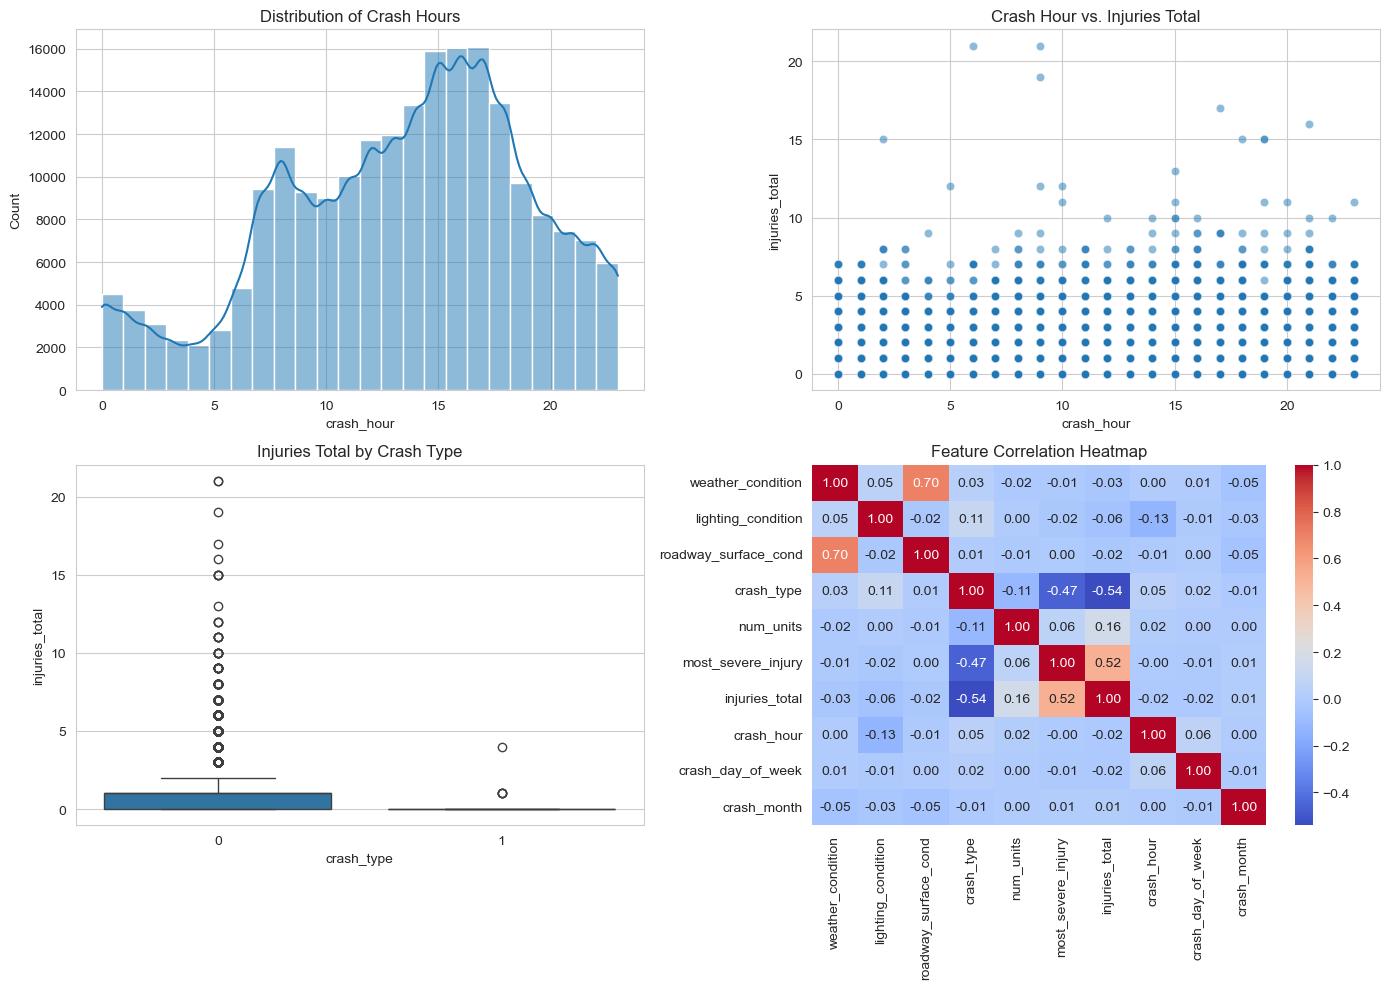

In [4]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram - Crash Hours
sns.histplot(df_selected["crash_hour"], bins=24, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Crash Hours")

# Scatter Plot - Crash Hour vs. Injuries Total
sns.scatterplot(x=df_selected["crash_hour"], y=df_selected["injuries_total"], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Crash Hour vs. Injuries Total")

# Box Plot - Injuries Total by Crash Type
sns.boxplot(x=df_selected["crash_type"], y=df_selected["injuries_total"], ax=axes[1, 0])
axes[1, 0].set_title("Injuries Total by Crash Type")

# Heatmap - Feature Correlations
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()


## Machine Learning Model Training & Evaluation

In [5]:

# Split data into training and testing sets
X = df_selected.drop(columns=["crash_type"])
y = df_selected["crash_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
results


{'Logistic Regression': 0.8209354545888873,
 'Decision Tree': 0.7997706750752472,
 'Random Forest': 0.8122879938846687,
 'KNN': 0.7925087191247432}